In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
dt = pd.read_csv("/content/dt_Grade_Cu_rdy.csv")

In [ ]:
dt.head()

,Fecha de reporte,MT,%Cu (Head),NaCN,ZnSO4,PAX,F-582,pH,%Cu (Grade),%Cu (Recovery),F.M
0,21-Oct-08,MT-824,1.41,50.0,200.0,14.0,10.0,9.65,20.45,64.68,938.057749
1,21-Oct-08,MT-825,0.21,0.0,0.0,10.0,10.0,9.80,6.88,41.90,1372.801138
2,21-Oct-08,MT-827,2.85,30.0,200.0,22.0,10.0,10.17,20.11,80.45,567.631536
3,21-Oct-08,MT-828,0.52,20.0,250.0,9.0,10.0,9.70,10.78,43.10,893.589248
4,21-Sep-08,MT-816,1.14,20.0,190.0,10.0,0.0,9.80,24.22,77.66,1649.922301


In [ ]:
dt = dt.drop(["Fecha de reporte","MT","%Cu (Recovery)","F.M"],axis= 1)

In [ ]:
dt.head()

,%Cu (Head),NaCN,ZnSO4,PAX,F-582,pH,%Cu (Grade)
0,1.41,50.0,200.0,14.0,10.0,9.65,20.45
1,0.21,0.0,0.0,10.0,10.0,9.80,6.88
2,2.85,30.0,200.0,22.0,10.0,10.17,20.11
3,0.52,20.0,250.0,9.0,10.0,9.70,10.78
4,1.14,20.0,190.0,10.0,0.0,9.80,24.22


In [ ]:
dt.shape

(2912, 7)

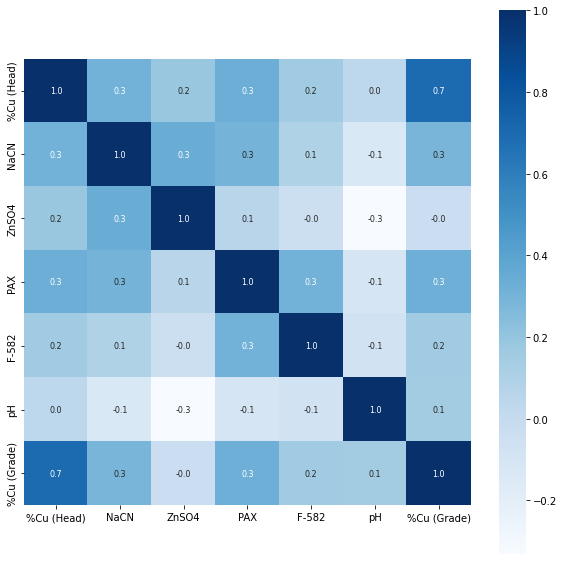

In [ ]:
correlation = dt.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True, square= True, fmt = ".1f", annot = True,annot_kws={'size':8}, cmap='Blues')

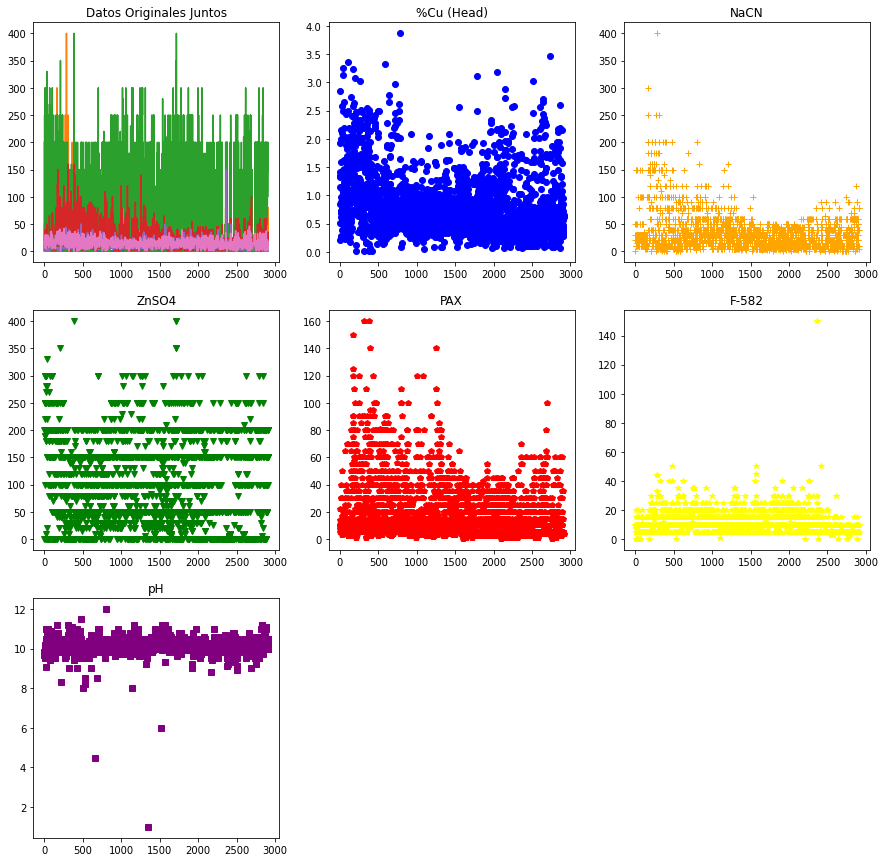

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

ax1.set_title("Datos Originales Juntos")
ax1.plot(dt)
ax2.set_title("%Cu (Head)")
ax2.plot(dt["%Cu (Head)"], linewidth=0, marker="o", color="blue", markersize=6)
ax3.set_title("NaCN")
ax3.plot(dt["NaCN"], linewidth=0, marker="+", color="orange", markersize=6)
ax4.set_title("ZnSO4")
ax4.plot(dt["ZnSO4"], linewidth=0, marker="v", color="green", markersize=6)
ax5.set_title("PAX")
ax5.plot(dt["PAX"], linewidth=0, marker="p", color="red", markersize=6)
ax6.set_title("F-582")
ax6.plot(dt["F-582"], linewidth=0, marker="*", color="yellow", markersize=6)
ax7.set_title("pH")
ax7.plot(dt["pH"], linewidth=0, marker="s", color="purple", markersize=6)
plt.show()

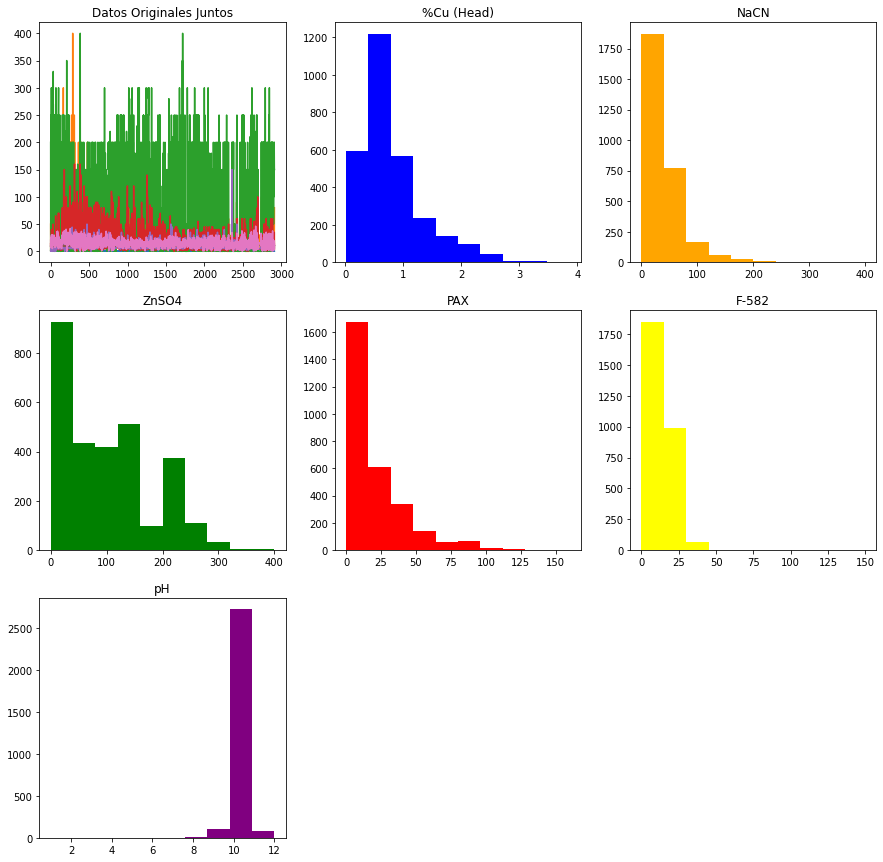

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

ax1.set_title("Datos Originales Juntos")
ax1.plot(dt)
ax2.set_title("%Cu (Head)")
ax2.hist(dt["%Cu (Head)"], color="blue")
ax3.set_title("NaCN")
ax3.hist(dt["NaCN"], color="orange")
ax4.set_title("ZnSO4")
ax4.hist(dt["ZnSO4"], color="green")
ax5.set_title("PAX")
ax5.hist(dt["PAX"], color="red")
ax6.set_title("F-582")
ax6.hist(dt["F-582"], color="yellow", )
ax7.set_title("pH")
ax7.hist(dt["pH"], color="purple")
plt.show()

In [ ]:
# Define a function called "plot_boxplot"
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

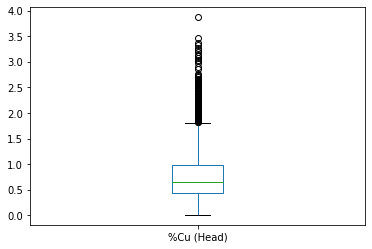

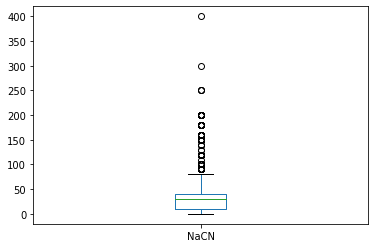

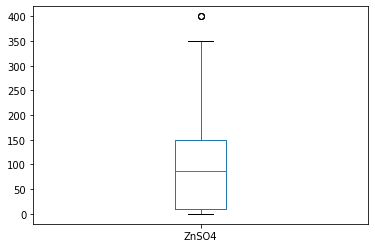

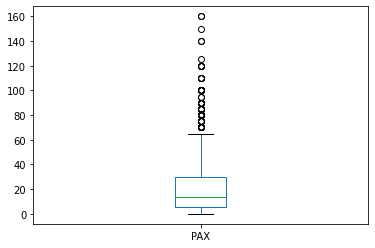

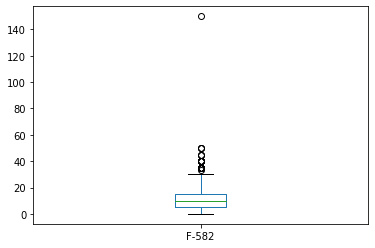

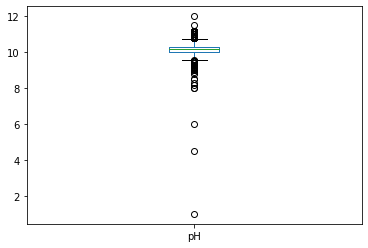

In [ ]:
plot_boxplot(dt,"%Cu (Head)")
plot_boxplot(dt,"NaCN")
plot_boxplot(dt,"ZnSO4")
plot_boxplot(dt,"PAX")
plot_boxplot(dt,"F-582")
plot_boxplot(dt,"pH")

In [ ]:
# Define a function called  "outliers" which returns a list of index of outliers
# IQR = Q3-Q1
#+/- 1.5*IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3- Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [ ]:
# Create a empty list to store the output indices from multiple columns
index_list = []
for feature in ["%Cu (Head)","NaCN","ZnSO4","PAX","F-582","pH"]:
    index_list.extend(outliers(dt,feature))

In [ ]:
print(len(set(index_list)))

577


In [ ]:
# Define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
dt_cleaned = remove(dt,index_list)

In [ ]:
dt_cleaned.shape

(2335, 7)

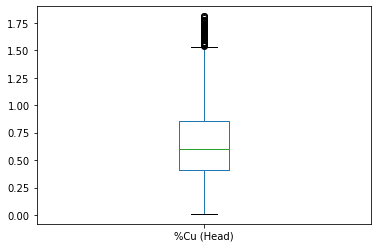

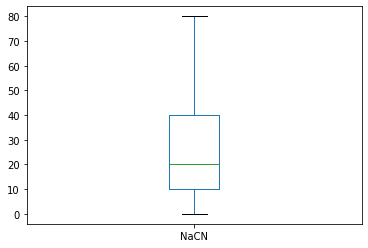

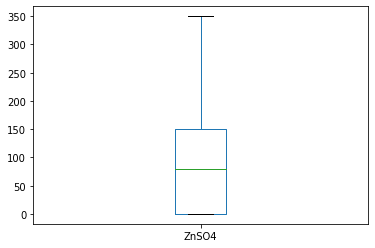

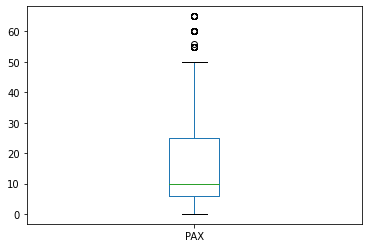

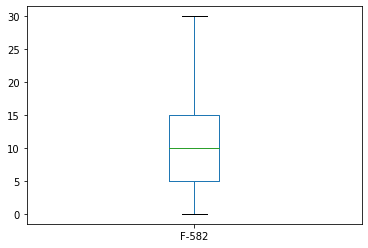

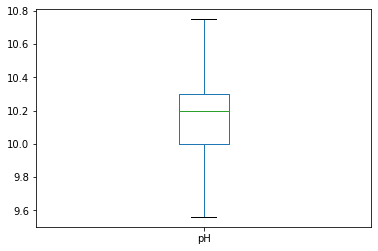

In [ ]:
plot_boxplot(dt_cleaned,"%Cu (Head)")
plot_boxplot(dt_cleaned,"NaCN")
plot_boxplot(dt_cleaned,"ZnSO4")
plot_boxplot(dt_cleaned,"PAX")
plot_boxplot(dt_cleaned,"F-582")
plot_boxplot(dt_cleaned,"pH")

In [ ]:
dt_cleaned_robust_scaler = preprocessing.RobustScaler().fit_transform(dt_cleaned)
datos_robust_scaler = pd.DataFrame(dt_cleaned_robust_scaler, columns=["%Cu (Head)","NaCN","ZnSO4","PAX","F-582","pH","%Cu (Grade)"])
# estandarizado = (X - rango_intercuartílico) / std

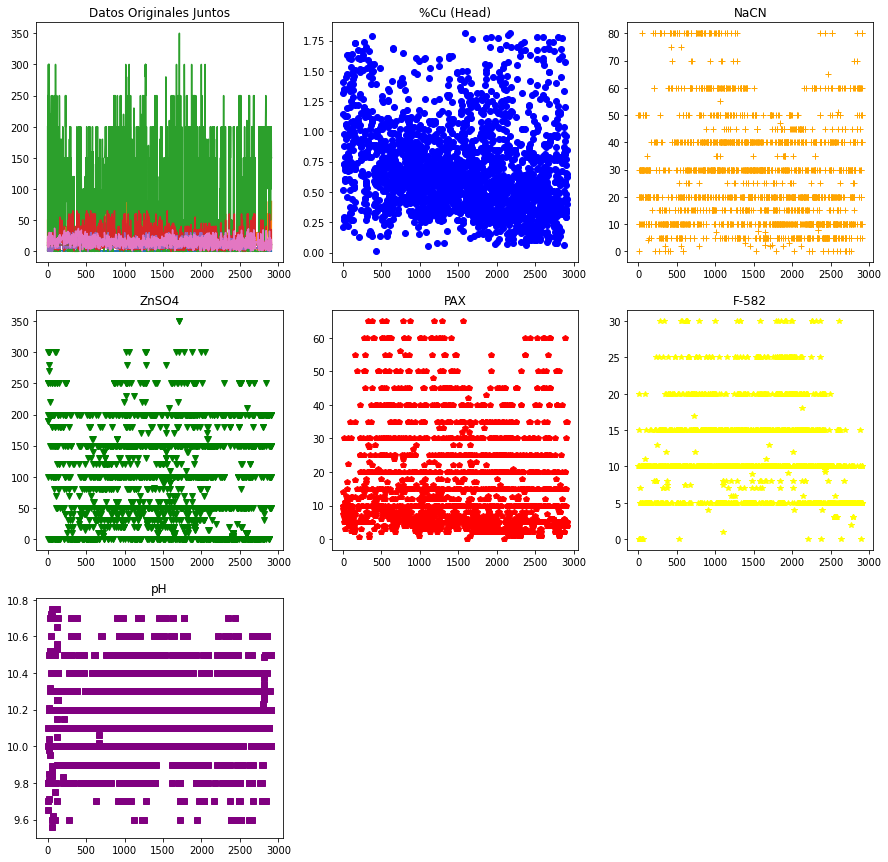

In [ ]:
# convierte vectores de numpy a DataFrames para graficarlos
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

ax1.set_title("Datos Originales Juntos")
ax1.plot(dt_cleaned)
ax2.set_title("%Cu (Head)")
ax2.plot(dt_cleaned["%Cu (Head)"], linewidth=0, marker="o", color="blue", markersize=6)
ax3.set_title("NaCN")
ax3.plot(dt_cleaned["NaCN"], linewidth=0, marker="+", color="orange", markersize=6)
ax4.set_title("ZnSO4")
ax4.plot(dt_cleaned["ZnSO4"], linewidth=0, marker="v", color="green", markersize=6)
ax5.set_title("PAX")
ax5.plot(dt_cleaned["PAX"], linewidth=0, marker="p", color="red", markersize=6)
ax6.set_title("F-582")
ax6.plot(dt_cleaned["F-582"], linewidth=0, marker="*", color="yellow", markersize=6)
ax7.set_title("pH")
ax7.plot(dt_cleaned["pH"], linewidth=0, marker="s", color="purple", markersize=6)
plt.show()


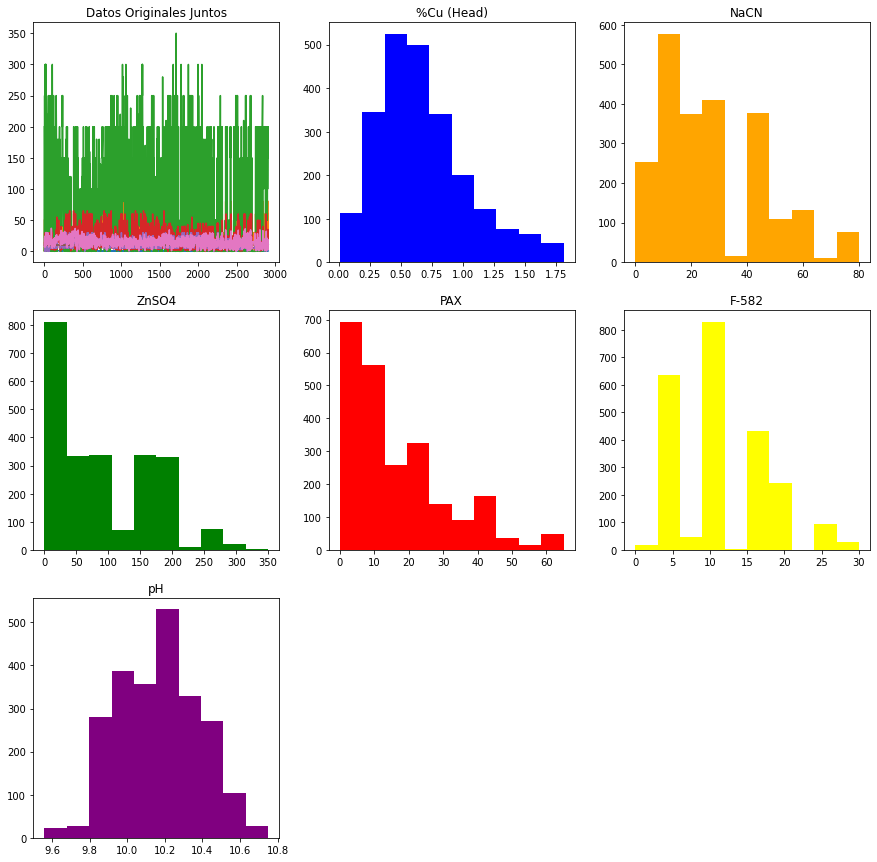

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

ax1.set_title("Datos Originales Juntos")
ax1.plot(dt_cleaned)
ax2.set_title("%Cu (Head)")
ax2.hist(dt_cleaned["%Cu (Head)"], color="blue")
ax3.set_title("NaCN")
ax3.hist(dt_cleaned["NaCN"], color="orange")
ax4.set_title("ZnSO4")
ax4.hist(dt_cleaned["ZnSO4"], color="green")
ax5.set_title("PAX")
ax5.hist(dt_cleaned["PAX"], color="red")
ax6.set_title("F-582")
ax6.hist(dt_cleaned["F-582"], color="yellow", )
ax7.set_title("pH")
ax7.hist(dt_cleaned["pH"], color="purple")
plt.show()

In [ ]:
X = datos_robust_scaler[["%Cu (Head)","NaCN","ZnSO4","PAX","F-582","pH"]]
Y = datos_robust_scaler["%Cu (Grade)"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2335, 6) (1868, 6) (467, 6)


In [ ]:
model = XGBRegressor(n_estimators=1500, learning_rate = 0.35,n_jobs=4)
model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)],verbose=False)

[17:54:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.35, n_estimators=1500, n_jobs=4)

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

# Cross Validation
scores = -1 * cross_val_score(model, X, Y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Cross Validation :",scores.mean())

R squared error :  0.5666192916719663
Mean Absolute Error :  0.4041941809249979
[17:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation : 0.5579650099910208


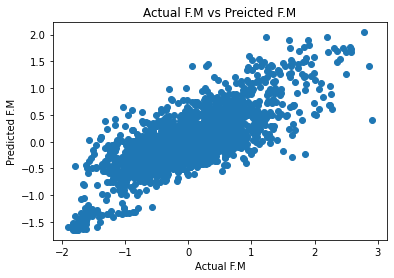

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual ")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.49575977459774623
Mean Absolute Error :  0.44624074746379555
